### Edgar Moises Hernandez-Gonzalez
#### 11/03/20-07/06/20
#### Imagen de CWT de EEG

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import cv2

In [2]:
#la muestra 3 es mano derecha
# canal C3 (canal 8)
# canal C4 (canal 12) (usar este)
canal = pd.read_csv("MI-EEG-A01T.csv", header=None).iloc[2, 11124:11624]
# canal = pd.read_csv("Ventaneo-A01T.csv", header=None).iloc[43:64, 5500:6000]

In [3]:
canal.shape

(500,)

(500,)


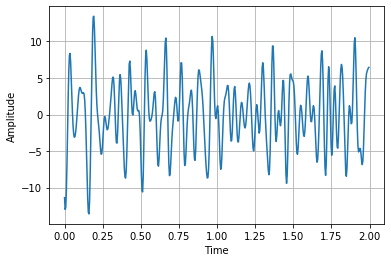

In [4]:
# Primer señal EEG del sujeto 1
# 2 segundos con fs=250Hz

fs = 250
time = np.arange(0, 2, 1/fs)
sig = canal
print(sig.shape)

plt.plot(time, sig)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [5]:
frecuencias = pywt.scale2frequency('cmor3-3', [2,4,8,16,32,64,128,256,512,1024]) / (1/fs)
print("Frecuencias para diferentes escalas cmor3-3: \n", frecuencias)

Frecuencias para diferentes escalas cmor3-3: 
 [375.         187.5         93.75        46.875       23.4375
  11.71875      5.859375     2.9296875    1.46484375   0.73242188]


In [6]:
coef, freqs = pywt.cwt(sig, np.arange(1,113), 'cmor3-3')

In [7]:
x = abs(coef)

(112, 500)


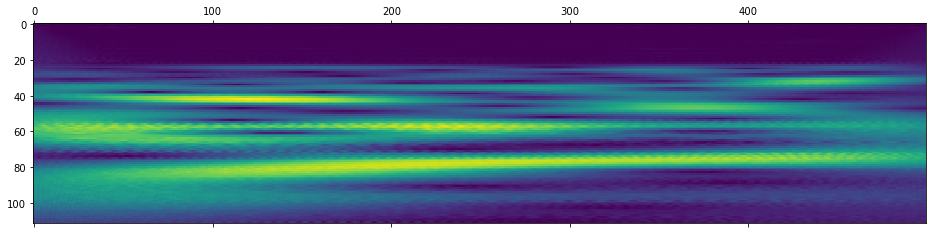

In [8]:
print(x.shape)
plt.matshow(x)
plt.show()

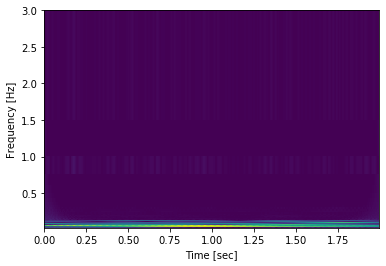

In [9]:
plt.pcolormesh(time, freqs, x)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

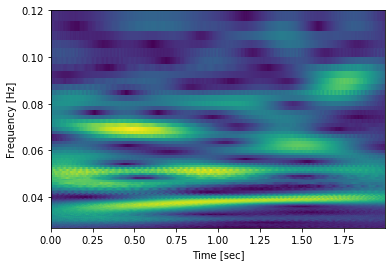

In [10]:
# Zoom
plt.pcolormesh(time, freqs, x)
plt.axis([0, time[-1:], freqs[-1:], 0.12])
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

In [11]:
x2 = x[-96:, :]

In [12]:
x2.shape

(96, 500)

(96, 500)


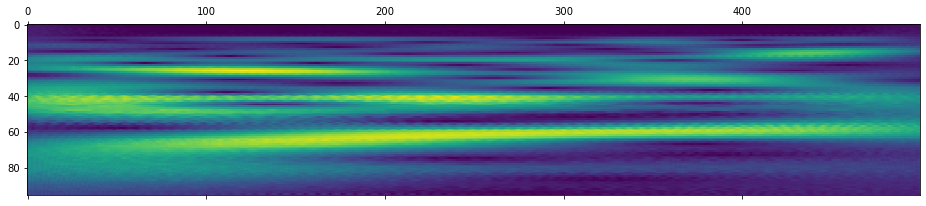

In [13]:
print(x2.shape)
plt.matshow(x2)
plt.show()

(6, 31)


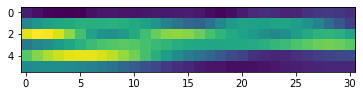

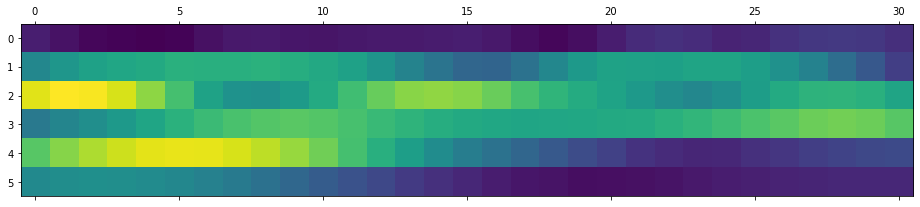

In [14]:
# en el resize los dos se dividen entre 4
dim = (31, 6) #ancho, alto

resized = cv2.resize(x2, dim, interpolation=cv2.INTER_AREA)
print(resized.shape)
plt.imshow(resized)
plt.show()

plt.matshow(resized)
plt.show()

##### Prueba de analisis de imagenes

In [0]:
#x2 = x
#x2 = MinMaxScaler(feature_range=(0, 255)).fit_transform(x)
#x2 = StandardScaler().fit_transform(x)

#talvez esta linea no hace falta porque /255 siempre da flotantes
#x2 = np.floor(x2) # aqui talvez puede ser ceil

#convertir a float
#x = x.astype('float32')

#escalar los valores en un rango de 0 a 1 (normalizar)
#x /= 255.0

# los valores siempre son float
#print(x2.shape)
#print(x2)
#plt.imshow(x2, cmap='Greys')
#plt.show()

In [34]:
imgRGB = np.zeros((128,500,3))

In [35]:
imgRGB[:,:,0] = x
imgRGB[:,:,1] = x
imgRGB[:,:,2] = x

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 500, 3)


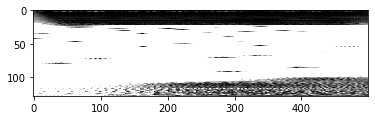

In [36]:
# esta es la imagen final
print(imgRGB.shape)
plt.imshow(imgRGB)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 500, 3)


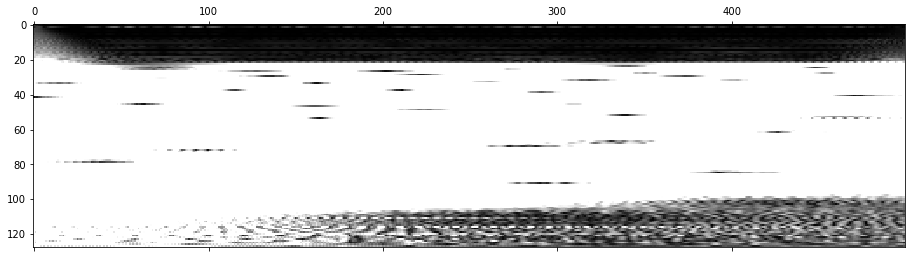

In [37]:
# creo esta es la imagen chida
print(imgRGB.shape)
plt.matshow(imgRGB)
plt.show()